In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import os
import operator

### Count number of contributors from 2011-2020

In [92]:
contributors_data = \
"""YEARS,CONTRIBUTORS
2011,37
2012,50
2013,50
2014,51
2015,62
2016,57
2017,53
2018,60
2019,79
2020,37"""

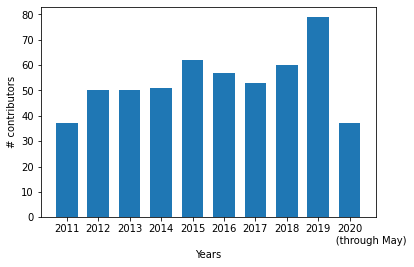

In [93]:
contributors_x = []
contributors_y = []
for line in contributors_data.split()[1:]:
    line = line.strip().split(',')
    contributors_x.append(line[0])
    contributors_y.append(int(line[1]))
contributors_x[-1] = "2020\n              (through May)"

# plot
fig, ax = plt.subplots()
x = np.arange(len(contributors_x)) * 1.6
plt.bar(x, contributors_y, width=1.1)
plt.xticks(x, contributors_x)
plt.xlabel('Years')
plt.ylabel('# contributors')
plt.subplots_adjust(bottom=0.15)
plt.savefig("fig/gem5_citations.pdf")
plt.show()

### Count number of commits from 2011-2020

In [94]:
commits_data = \
"""YEARS,COMMITS
2011,837
2012,728
2013,627
2014,629
2015,659
2016,497
2017,623
2018,1093
2019,1164
2020,684"""

In [ ]:
commits_x = []
commits_y = []
for line in citations_data.split()[1:]:
    line = line.strip().split(',')
    citations_x.append(line[0])
    citations_y.append(int(line[1]))
citations_x[-1] = "2020\n              (through May)"

# plot
fig, ax = plt.subplots()
x = np.arange(len(citations_x)) * 1.6
plt.bar(x, citations_y, width=1.1)
plt.xticks(x, citations_x)
plt.xlabel('Years')
plt.ylabel('# citations')
plt.subplots_adjust(bottom=0.15)
plt.savefig("fig/gem5_citations.pdf")
plt.show()

### Count number of citations from 2011-2020

In [15]:
citations_data = \
"""YEAR,CITATIONS
2011,6
2012,80
2013,255
2014,387
2015,499
2016,540
2017,587
2018,555
2019,598
2020,150"""

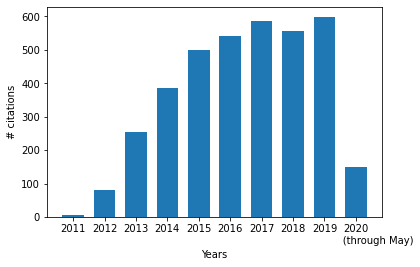

In [91]:
citations_x = []
citations_y = []
for line in citations_data.split()[1:]:
    line = line.strip().split(',')
    citations_x.append(line[0])
    citations_y.append(int(line[1]))
citations_x[-1] = "2020\n              (through May)"

# plot
fig, ax = plt.subplots()
x = np.arange(len(citations_x)) * 1.6
plt.bar(x, citations_y, width=1.1)
plt.xticks(x, citations_x)
plt.xlabel('Years')
plt.ylabel('# citations')
plt.subplots_adjust(bottom=0.15)
plt.savefig("fig/gem5_citations.pdf")
plt.show()

### Determine companies/institutions contributions

In [87]:
# commit_2011_hash = "5e25f3171"
# git checkout v20.0.0.0
# git shortlog 5e25f3171..HEAD > authors

known_domains = { # Please add if I missed a non-personal domain
    "arm.com",
    "wisc.edu",
    "umich.edu",
    "amd.com",
    "ucdavis.edu",
    "virginia.edu",
    "metempsy.com",
    "cornell.edu",
    "barkhauseninstitut.org",
    "mit.edu",
    "google.com",
    "ucf.edu",
    "cam.ac.uk",
    "tu-dresden.de",
    "utexas.edu",
    "uni-kl.de",
    "gatech.edu",
    "oregonstate.edu",
    "lirmm.fr",
    "tsinghua.org.cn",
    "ed.ac.uk",
    "inria.fr",
    "irisa.fr",
    "rutgers.edu",
    "labware.com",
    "unibo.it",
    "uni-augsburg.de",
    "microsoft.com",
    "ucm.es",
    "samsung.com",
    "mediatek.com",
    "bsc.es",
    "ncic.ac.cn",
    "micron.com",
    "unican.es",
    "upc.edu",
    "intel.com",
    "sandia.gov",
    "drexel.edu",
    "ibm.com",
    "dtu.dk",
    "duke.edu",
    "uchicago.edu",
    "ethz.ch",
    "gwu.edu",
    "rochester.edu",
    "ugent.be",
    "forth.gr",
    "tamu.edu",
    "streamcomputing.com",
    "colostate.edu",
    "harvard.edu",
    "riken.jp",
    "nudt.edu.cn",
    "jiegec.ac.cn"
}

def get_email_address_domain(email_address):
    email_address = email_address.replace(",", ".")
    email_address = email_address.lower()
    email_address = email_address.split('@')
    if len(email_address) < 2:
        return ""
    subdomain = email_address[1].split('.')
    if len(subdomain) < 2:
        return subdomain[0]
    if len(subdomain) >= 3:
        if subdomain[-2] == "ac" or subdomain[-2] == "edu" or subdomain[-2] == "org": # .ac.uk, .ac.cn
            return '.'.join(subdomain[-3:])
    domain = '.'.join(subdomain[-2:])
    return domain

commits = {domain: 0 for domain in known_domains}
commits["other"] = 0
with open(os.path.join(os.getcwd(), "../gem5/authors"), 'r') as f:
    for line in f:
        line = line.strip().split("\t")
        n_commits = int(line[0])
        line = line[1].split(" ")
        email_address = line[-1][1:-1]
        domain = get_email_address_domain(email_address)
        if domain in known_domains:
            commits[domain] += n_commits
        else:
            commits["other"] += n_commits
sorted_commits = sorted(commits.items(), key=operator.itemgetter(1), reverse = True)
from pprint import pprint
pprint(sorted_commits)

[('arm.com', 3125),
 ('google.com', 1395),
 ('other', 701),
 ('wisc.edu', 618),
 ('umich.edu', 571),
 ('amd.com', 553),
 ('ucdavis.edu', 133),
 ('metempsy.com', 80),
 ('virginia.edu', 51),
 ('cornell.edu', 33),
 ('cam.ac.uk', 27),
 ('barkhauseninstitut.org', 24),
 ('tu-dresden.de', 23),
 ('mit.edu', 21),
 ('ucf.edu', 21),
 ('utexas.edu', 20),
 ('uni-kl.de', 13),
 ('gatech.edu', 10),
 ('oregonstate.edu', 9),
 ('irisa.fr', 8),
 ('tsinghua.org.cn', 8),
 ('bsc.es', 8),
 ('ed.ac.uk', 7),
 ('lirmm.fr', 7),
 ('inria.fr', 6),
 ('micron.com', 5),
 ('microsoft.com', 4),
 ('unican.es', 4),
 ('ucm.es', 4),
 ('rutgers.edu', 4),
 ('labware.com', 4),
 ('unibo.it', 4),
 ('uni-augsburg.de', 4),
 ('mediatek.com', 3),
 ('samsung.com', 3),
 ('ncic.ac.cn', 3),
 ('upc.edu', 3),
 ('intel.com', 2),
 ('drexel.edu', 2),
 ('riken.jp', 2),
 ('ibm.com', 2),
 ('sandia.gov', 2),
 ('ethz.ch', 2),
 ('duke.edu', 1),
 ('streamcomputing.com', 1),
 ('harvard.edu', 1),
 ('rochester.edu', 1),
 ('ugent.be', 1),
 ('uchicago.e